## Lets import MNIST

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y.shape

(70000,)

Lets take a peek at one single picture in the data. All we got to do is grab an instance feature vector shape it to 28*28 and display by matplotlib class


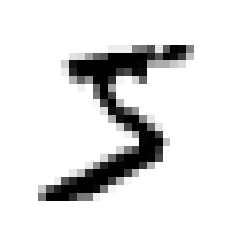

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.values.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X.iloc[0]
plot_digit(some_digit)
plt.show()


In [7]:
y[0]

'5'

In [8]:

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier
Lets classify whether the number is 5 or not 5

In [9]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

### Lets use SGD Classifier

This classifier
has the advantage of being capable of handling very large datasets efficiently. This is
in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

C:\Users\kraiy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [12]:
import numpy as np

np.unique(y_train_5)

array([False,  True])

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

The results here can be very delusional as lets take an example of a very dumb classifier


In [14]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [15]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

## Confusion Matrix
 A much better way is to look at the confusion matrix i.e count the number of times instances of class A are classified as class B

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
# Lets make the confusion matrix now on the predicted values and the actual values

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

The confusion matrix gives you a lot of information, but sometimes you may prefer a
more concise metric. An interesting one to look at is the accuracy of the positive pre‐
dictions; this is called the precision of the classifier 

precision = TP/(TP + FP)

## Precision and Recall

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers

`The F1 score is the harmonic mean of precision and recall` 

As a result, the classifier will only get a high F1
 score if both recall and precision are
high.

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

The F1
score favors classifiers that have similar precision and recall. This is not always
what you want: in some contexts you mostly care about precision, and in other con‐
texts you really care about recall. 

For example, if you trained a classifier to detect vid‐
eos that are safe for kids, you would probably prefer a classifier that rejects many
good videos (low recall) but keeps only safe ones (high precision), rather than a clas‐
sifier that has a much higher recall but lets a few really bad videos show up in your
product (in such cases, you may even want to add a human pipeline to check the clas‐
sifier’s video selection). 

On the other hand, suppose you train a classifier to detect
shoplifters in surveillance images: it is probably fine if your classifier has only 30%
precision as long as it has 99% recall (sure, the security guards will get a few false
alerts, but almost all shoplifters will get caught).
Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. 

`This is called the precision/recall trade-off.`


In [21]:
# lets try using the decision_function
y_scores = sgd_clf.decision_function([some_digit])
y_scores


C:\Users\kraiy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [22]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [23]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")


In [25]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Threshold")
 plt.ylabel("Values")
 plt.legend()


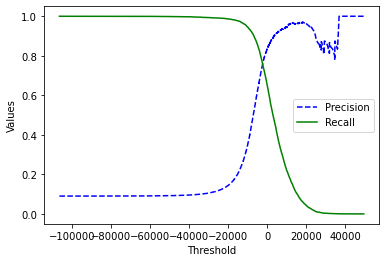

In [27]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [28]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


In [29]:
y_train_pred_90 = (y_scores>=threshold_90_precision)

In [30]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [31]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

If someone says, “Let’s reach 99% precision,” you should ask, “At
what recall?

### The ROC Curve

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


In [33]:
def plot_roc_curves(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xlabel("False Positive Rate ")
    plt.ylabel("True Positive rate (recall)")
    

<function matplotlib.pyplot.show(close=None, block=None)>

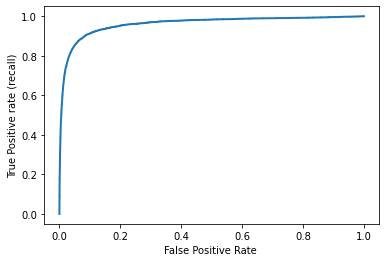

In [34]:
plot_roc_curves(fpr,tpr)
plt.show

In [35]:
# Lets calculate the area under the curve


from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

`Since the ROC curve is so similar to the precision/recall (PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives. Otherwise, use the ROC curve. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topleft corner).`


Lets use randomForestclassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

In [37]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

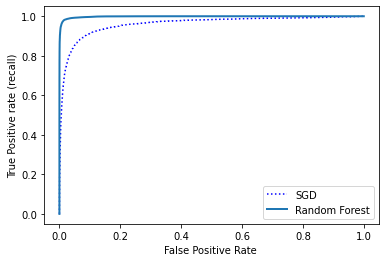

In [38]:
plt.plot(fpr, tpr, 'b:', label="SGD")
plot_roc_curves(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [39]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [40]:
precisions_forest, recalls_forest, thresholds_forest= precision_recall_curve(y_train_5, y_scores_forest)

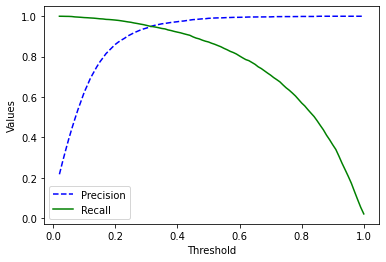

In [41]:
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest,thresholds_forest)
plt.show()


## Multiclass Classifier

Some algorithms (such as SGD classifiers, Random Forest classifiers, and naive Bayes
classifiers) are capable of handling multiple classes natively. Others (such as Logistic
Regression or Support Vector Machine classifiers) are strictly binary classifiers. How‐
ever, there are various strategies that you can use to perform multiclass classification
with multiple binary classifiers.


In [42]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

C:\Users\kraiy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [43]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores


C:\Users\kraiy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [44]:
np.argmax(some_digit_scores)

5

If you want to force Scikit-Learn to use one-versus-one or one-versus-the-rest, you
can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an
instance and pass a classifier to its constructor (it does not even have to be a binary
classifier). For example, this code creates a multiclass classifier using the OvR strat‐
egy, based on an SVC:


In [46]:
# from sklearn.multiclass import OneVsRestClassifier
# ovr_clf = OneVsRestClassifier(SVC())
# ovr_clf.fit(X_train, y_train)
# ovr_clf.predict([some_digit])


In [47]:
# len(ovr_clf.estimators_)

In [48]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\kraiy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype='<U1')

In [49]:
sgd_clf.decision_function([some_digit])


C:\Users\kraiy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [50]:
 cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


array([0.8983, 0.891 , 0.9018])

## Lets make the confusion matrix now


In [52]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

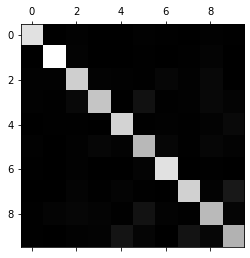

In [53]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [57]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sum

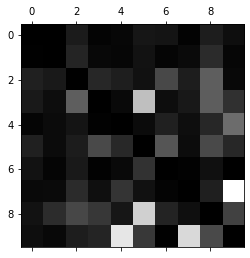

In [58]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [75]:
# cl_a ,cl_b = 3,5
# #true_3 = y_train == cl_a

# #true_5 = y_train == cl_b
# X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
# X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
# X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
# X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [76]:
# def plot_digits(instances,images_per_row,**options):
    
#     size  = 28
    
#     images_per_row = min(len(instances),images_per_row)
    
#     images = [instance.reshape(size,-1) for instance in instances]
    
#     n_rows  = (len(instances)-1) // images_per_row +1 
    
#     row_images = []
    
#     n_empty = n_rows * images_per_row -len(instances)
    
#     images.append(np.zeros((size,size*n_empty)))
    
#     for row in range(n_rows):
        
#         rimages  = images [ row * images_per_row : (row+1) * images_per_row ]
#         row_images.append(np.concatenate(rimages, axis = 1 ))
        
#     image = np.concatenate(row_images,axis  = 0)
#     plt.imshow(image,cmap = mpl.cm.binary,**options)
#     plt.axis('off') 

# plt.figure(figsize=(16,16))
# plt.subplot(221); plot_digits(X_aa[:30],images_per_row= 6)
# plt.subplot(222); plot_digits(X_ab[:30],images_per_row= 6)
# plt.subplot(223); plot_digits(X_ba[:30],images_per_row= 6)
# plt.subplot(224); plot_digits(X_bb[:30],images_per_row= 6)
# plt.show()

## Multilabel Classification
Until now each instance has always been assigned to just one class. In some cases you
may want your classifier to output multiple classes for each instance. Consider a facerecognition classifier: what should it do if it recognizes several people in the same
picture? It should attach one tag per person it recognizes. Say the classifier has been
trained to recognize three faces, Alice, Bob, and Charlie. Then when the classifier is
shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes,
Bob no, Charlie yes”). Such a classification system that outputs multiple binary tags is
called a multilabel classification system.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

y_graterthan_7 =(y_train >= 7)
y_odd = (y_train % 2 ==1)

y_train_multilabel = np.c_[y_graterthan_7,y_odd]

kneighborsclassifier = KNeighborsClassifier()
kneighborsclassifier.fit(X_train,y_train_multilabel)

In [80]:
kneighborsclassifier.predict([some_digit])

In [83]:
y_train_knn_pred = cross_val_predict(kneighborsclassifier, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

## Multioutput Classification
The last type of classification task we are going to discuss here is called multioutput–multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

In [91]:
noise = np.random.randint(0,100,(len(X_train),784))
test_noise = np.random.randint(0,100,(len(X_test),784))

In [92]:
X_train_mc = X_train + noise
X_test_mc = X_test + test_noise

y_test_mc =  X_test
y_train_mc = X_train

In [94]:
from sklearn.neighbors import KNeighborsClassifier
kneighborsclassifier = KNeighborsClassifier()
kneighborsclassifier.fit(X_train_mc,y_train_mc)
clean_digit = kneighborsclassifier.predict([X_test_mod[3000]])
plot_digit(clean_digit),plot_digit(X_test_mc[3000])

KeyError: 3000